In [2]:
#I want to put this in the get get_author_by_email script later

import openreview
import pandas as pd
import datetime as date
import tqdm
import json
from email2country import email2country,email2institution_country
import matplotlib.pyplot as plt
import ast
client = openreview.Client(baseurl='https://api.openreview.net')

In [3]:
df_author_info = pd.read_csv('./data/authors/df_author_profiles.csv')

try:
    df_author_info = df_author_info.drop(columns=['Unnamed: 0'])
except:
    pass
df_author_info.history[300]

"[{'position': 'Researcher', 'start': 2021, 'end': None, 'institution': {'domain': 'microsoft.com', 'name': 'Microsoft'}}, {'position': 'PhD student', 'start': 2015, 'end': 2021, 'institution': {'name': 'Johns Hopkins University', 'domain': 'jhu.edu'}}, {'position': 'Undergrad student', 'start': 2011, 'end': 2015, 'institution': {'name': 'University of California Berkeley', 'domain': 'berkeley.edu'}}]"

In [125]:
#this is gathering all the emails
update = 0
institution_dic ={}

if update ==1:
    for domain in tqdm.tqdm(list(set(df_author_info['email'].apply(lambda x: x.split('@')[1]).tolist()))):
        if domain in institution_dic.keys():
            pass
        else:
            try:
                institution_dic[domain] = client.get_institution(domain)
            except:
                institution_dic[domain] = {'country':domain,'institution':domain}
                
    with open('./data/authors/institution_dic.json', 'w') as fp:
        json.dump(institution_dic, fp)
else:
    institution_dic = json.load(open('./data/authors/institution_dic.json'))

institution_dic

{'iwr.uni-heidelberg.de': {'parent': 'uni-heidelberg.de',
  'shortname': '',
  'fullname': 'Heidelberg University',
  'id': 'iwr.uni-heidelberg.de'},
 'cs.uni.wroc.pl': {'country': 'cs.uni.wroc.pl',
  'institution': 'cs.uni.wroc.pl'},
 'sam.math.ethz.ch': {'country': 'sam.math.ethz.ch',
  'institution': 'sam.math.ethz.ch'},
 'ustc.edu.cn': {'parent': '',
  'shortname': '',
  'fullname': 'University of Science and Technology of China',
  'id': 'ustc.edu.cn',
  'country': 'China',
  'alphaTwoCode': 'CN',
  'webPages': ['http://www.ustc.edu.cn/']},
 'post.pl': {'country': 'post.pl', 'institution': 'post.pl'},
 'huan-zhang.com': {'country': 'huan-zhang.com',
  'institution': 'huan-zhang.com'},
 'thalesgroup.com': {'country': 'thalesgroup.com',
  'institution': 'thalesgroup.com'},
 'ncat.edu': {'parent': '',
  'shortname': '',
  'fullname': 'North Carolina A&T State University',
  'id': 'ncat.edu',
  'country': 'United States',
  'alphaTwoCode': 'US',
  'webPages': ['http://www.ncat.edu/']}

In [126]:
institution_dic['ohio.edu']['country']


'United States'

In [121]:
#wrapper_get_institution('Naveen.Ramakrishnan@us.bosch.com')

def get_institution_info(row):
    text = row['email']
    domain = text.split('@')[1]
    try:
        output = institution_dic[domain]
        return output['country'],output['fullname']
    except:
        try:
            message = None#'institution_dic error'
            country = email2institution_country(domain,enable_warning=False)
            return country,domain
        except:
            message = None #'email2institution_country error'
            return message,domain

def get_history(row):
    #errored still
    str_2017_position =''
    str_2018_position =''
    str_2019_position =''
    row = row['history']
    try:
        if type(row)==str:
            row = ast.literal_eval(row)

        for dict_history in row:
            #ICLR 2017 submission deadline 11/4/2016
            #ICLR 2018 submission deadline 10/27/2017
            #ICLR 2019 submission deadline 9/27/2018

            start = pd.to_datetime(dict_history['start'],format='%Y')
            if dict_history['end'] is None:
                end = pd.Timestamp.now()
            else:
                end = pd.to_datetime(dict_history['end'],format='%Y')


            if start < pd.to_datetime('11/4/2016') <= end:
                str_2017_position = dict_history['position']

            if start < pd.to_datetime('10/27/2017') <= end:
                str_2018_position = dict_history['position']

            if start < pd.to_datetime('9/27/2018') <= end:
                str_2019_position = dict_history['position']            

        return str_2017_position, str_2018_position, str_2019_position
    except:
        return None,None,None


In [120]:
ast.literal_eval(df_author_info.history[7])

[]

In [122]:
tqdm.tqdm.pandas()
update = 1
if update == 1:
    df_author_info[['location','institution']]=df_author_info.progress_apply(lambda x: get_institution_info(x),axis=1,result_type = 'expand')
    df_author_info.to_csv('./data/authors/df_author_profiles.csv',index=False)
else:
    pass


100%|███████████████████████████████████████| 8106/8106 [01:48<00:00, 74.52it/s]


In [123]:
tqdm.tqdm.pandas()
update = 1
if update == 1:
    df_author_info[['2017_position','2018_position','2019_position']]=df_author_info.progress_apply(lambda x: get_history(x),axis=1,result_type = 'expand')
    df_author_info.to_csv('./data/authors/df_author_profiles.csv',index=False)
else:
    pass


100%|█████████████████████████████████████| 8106/8106 [00:06<00:00, 1228.01it/s]


In [124]:
df_author_info[['2017_position','2018_position','2019_position']]

,2017_position,2018_position,2019_position
0,None,None,None
1,,,
2,None,None,None
3,None,None,None
4,None,None,None
...,...,...,...
8101,None,None,None
8102,None,None,None
8103,PhD student,PhD student,PhD student
8104,Associate Professor,Associate Professor,Associate Professor


<AxesSubplot:>

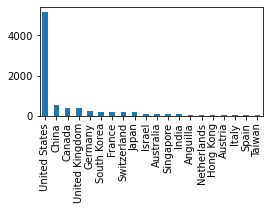

In [37]:
df_author_info['location'].value_counts().nlargest(20).plot(kind='bar',figsize = (4,2))


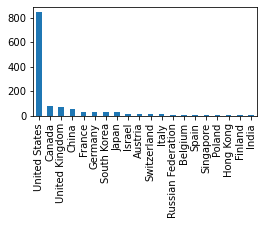

In [38]:
df_author_loaction_2017 = df_author_info.query("year==2017")
df_author_loaction_2018 = df_author_info.query("year==2018")
df_author_loaction_2019 = df_author_info.query("year==2019")


x1 = df_author_loaction_2017['location'].value_counts().nlargest(20).plot(kind='bar',figsize = (4,2))

<AxesSubplot:>

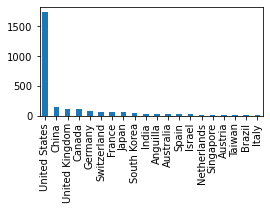

In [39]:
df_author_loaction_2018['location'].value_counts().nlargest(20).plot(kind='bar',figsize = (4,2))

<AxesSubplot:>

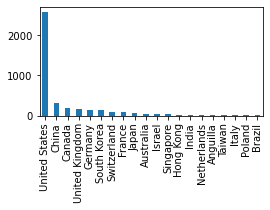

In [40]:
df_author_loaction_2019['location'].value_counts().nlargest(20).plot(kind='bar',figsize = (4,2))


In [42]:
df_author_info.groupby('institution')['institution'].count().nlargest(50)




institution
gmail.com                966
google.com               810
microsoft.com            182
berkeley.edu             161
mit.edu                  158
cs.cmu.edu               136
fb.com                   126
stanford.edu             122
us.ibm.com                96
pku.edu.cn                91
cs.stanford.edu           80
umich.edu                 75
cs.toronto.edu            74
gatech.edu                69
illinois.edu              67
intel.com                 60
usc.edu                   57
eecs.berkeley.edu         56
kaist.ac.kr               54
duke.edu                  49
andrew.cmu.edu            47
baidu.com                 46
cs.washington.edu         46
umontreal.ca              43
cam.ac.uk                 42
inf.ethz.ch               42
nyu.edu                   41
columbia.edu              40
robots.ox.ac.uk           40
snu.ac.kr                 40
csail.mit.edu             37
cornell.edu               36
imperial.ac.uk            36
epfl.ch                   35
nv

In [41]:
df_author_info.groupby(['year','location']).institution.count()

year  location            
2017  Anguilla                   2
      Australia                  4
      Austria                   14
      Belgium                    7
      Brazil                     3
                              ... 
2019  United Arab Emirates       1
      United Kingdom           171
      United States           2585
      Uruguay                    2
      Vietnam                    1
Name: institution, Length: 117, dtype: int64

In [32]:
df_missing_locations_by_domiain = pd.read_csv('./data/authors/email_location_missing.csv')

dict_missing_email_location = {}
for index, row in df_missing_locations_by_domiain.iterrows():
    dict_missing_email_location[row[0]] = row[1]

In [33]:
def get_missing_location(row):
    try:
        location = dict_missing_email_location[row['institution']]
    except:
        location = row['location']
    return location

df_author_info['location'] = df_author_info.apply(lambda x: get_missing_location(x), axis = 1)

In [43]:
df_author_info.to_csv('./data/authors/df_author_profiles.csv',index=False)